## UMAP(Uniform Manifold Approximation)
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data:

In [ ]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()


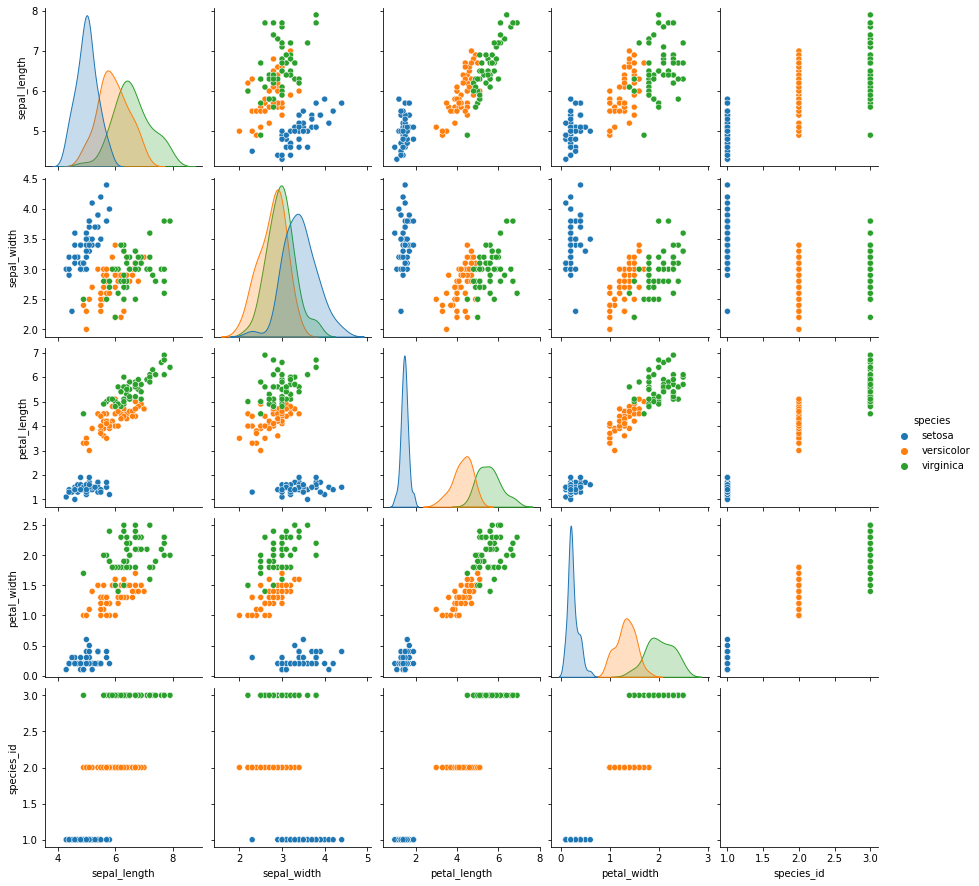

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='species')

## Project data into 2D with t-SNE and px.scatter

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## Project data into 3D with t-SNE and px.scatter_3d

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## Projections with UMAP

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 11.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0689561d0d3279ae9ec66b8c7618923e79920063eeeb52b58fb5a131850e5630
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=c37e303a891cac91a694cb39e9f83b532212a29a81c4b9d909e7b47deb68ed76
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()